In [1]:
%matplotlib inline
import numpy as np
from scipy.sparse.linalg import svds

import matplotlib.pyplot as plt

Set seed for reproducibility.

In [2]:
np.random.seed(117)

In [3]:
def get_lr(m, n, k, scale=0.1):
    W = np.random.randn(m, k)
    W = W / np.sqrt(np.sum(W**2, axis=0))
    
    H = np.random.rand(k, n)
    H = H / np.sum(H, axis=0)
    
    L = np.matmul(W, H)
    N = (scale*np.max(L))*np.random.randn(m,n)
    
    X = L + N
    
    return X

### Dense versus Sparse SVD (Random matrices)

In [4]:
m = 4000
n = 3000

In [5]:
# Gaussian matrix
#X = np.random.randn(m, n)

# Random lowrank matrix
X = get_lr(m, n, 30)

In [6]:
s = np.linalg.svd(X, compute_uv=False)

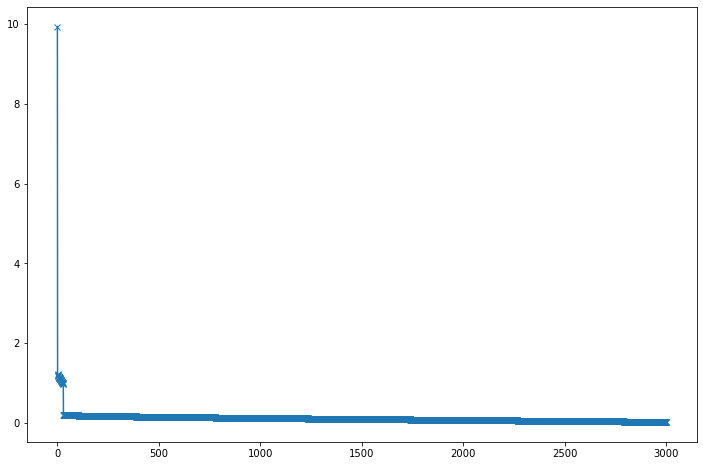

In [7]:
plt.figure(figsize=(12, 8))
plt.plot(s, 'x-')

In [8]:
%%timeit
s = np.linalg.svd(X, compute_uv=False)

12.1 s ± 378 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [9]:
num_svals = 30
sk = svds(X, k=num_svals, return_singular_vectors=False)

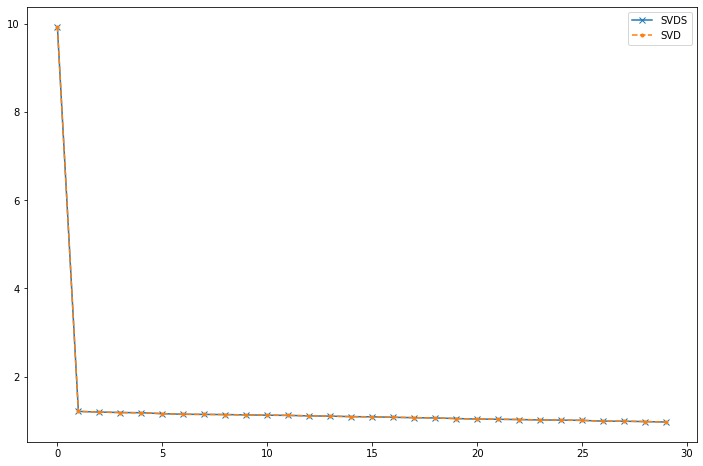

In [10]:
plt.figure(figsize=(12, 8))
plt.plot(sk[::-1], 'x-', label='SVDS')
plt.plot(s[:num_svals], '.--', label='SVD')
plt.legend()

In [11]:
%%timeit
sk = svds(X, k=num_svals, return_singular_vectors=False)

526 ms ± 40.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


### RandSVD

In [12]:
def randsvd(A, k, p=4, q=2):
    m, n = A.shape
    W    = np.random.randn(n, k+p)
    Y    = np.matmul(A, W)
    Q,_  = np.linalg.qr(Y)
    
    for i in range(q):
        Y   = np.matmul(A.T, Q)
        Q,_ = np.linalg.qr(Y)
        Y   = np.matmul(A, Q)
        Q,_ = np.linalg.qr(Y)
        
    B = np.matmul(Q.T, A)
    s = np.linalg.svd(B, compute_uv=False)
    
    return s

In [19]:
rsk    = {}
qrange = range(5)

for i in qrange:
    rsk[i] = randsvd(X, num_svals, q=i)

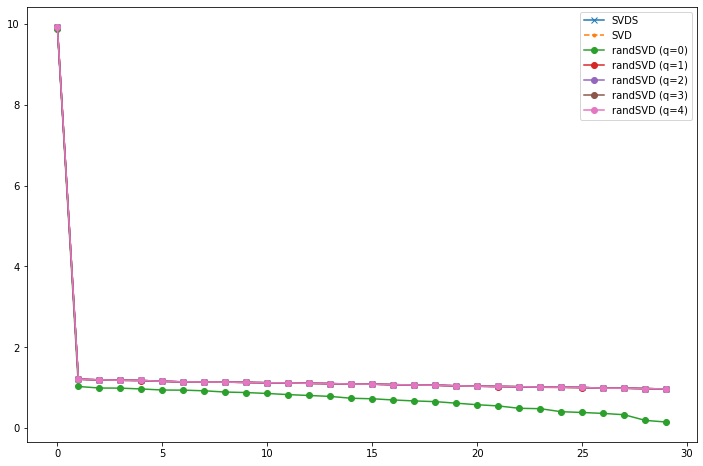

In [20]:
plt.figure(figsize=(12, 8))
plt.plot(sk[::-1], 'x-', label='SVDS')
plt.plot(s[:num_svals], '.--', label='SVD')

for i in qrange:
    plt.plot(rsk[i][:num_svals], 'o-', label=f"randSVD (q={i})")

plt.legend()

Plot the errors.

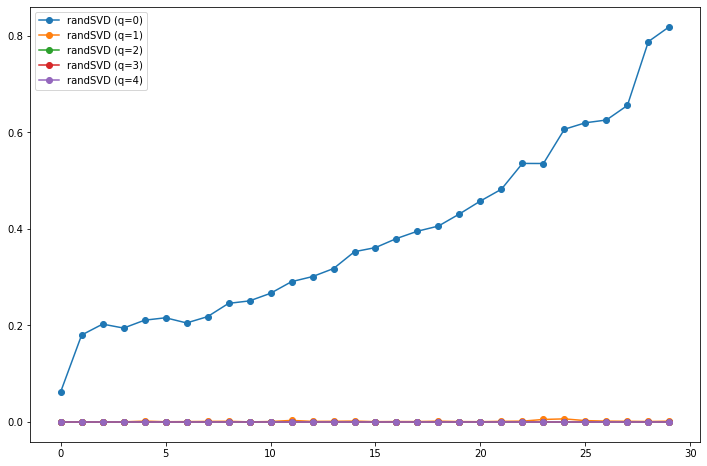

In [21]:
plt.figure(figsize=(12, 8))

for i in qrange:
    plt.plot(np.abs(s[:num_svals] - rsk[i][:num_svals]), 'o-', label=f"randSVD (q={i})")
    
plt.legend()

In [22]:
%%timeit
rsk = randsvd(X, num_svals, q=0)

98.4 ms ± 8.22 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [23]:
%%timeit
rsk = randsvd(X, num_svals, q=min(qrange))

91.1 ms ± 5.31 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [24]:
%%timeit
rsk = randsvd(X, num_svals, q=max(qrange))

483 ms ± 20.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
